In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [3]:
mangaid = '1-284293'
nsa_z = 0.129080
plateifu = '8318-6102'

In [4]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8318-6102-LOGCUBE.fits.gz')

flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

do_not_use = (mask & 2**10) != 0 

wave = data['WAVE'].data

flux_header = data['FLUX'].header

In [5]:
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j]
        sumflux = np.add(sumflux, flux[i,j])

In [6]:
a = 5007 * (1 + nsa_z)

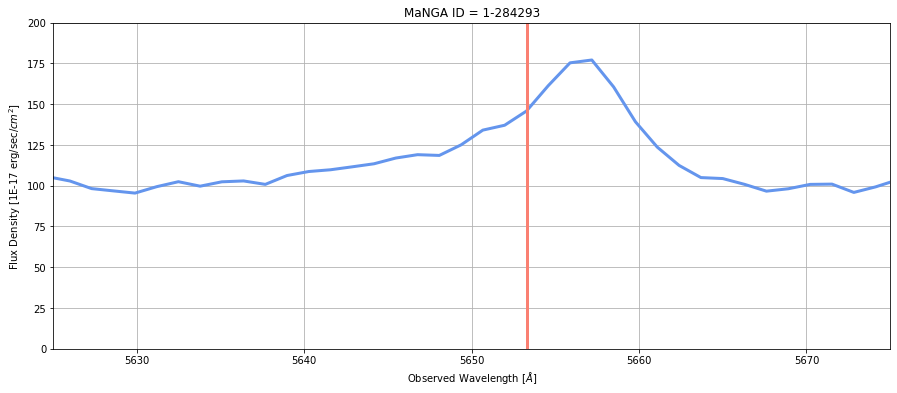

In [7]:
start = 5625
end = 5675
height = 200
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, linewidth = 3, color = 'cornflowerblue')
plt.axvline(a, linewidth = 3, color = 'salmon')
# plt.savefig('Images/Check_z_{}'.format(mangaid), bbox_inches = 'tight')

## Lower Bound -- Lower MBH

In [106]:
# select peak region
index = 0
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
# yaxis = yaxis[9:32]
yaxis_lower = yaxis[14:29]
print(yaxis_lower)
print(len(yaxis_lower))

# for i in yaxis:
#     print(wave[i])

[1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
 1941]
15


In [107]:
flux_compare = [] 
ivar_compare = []

for i in yaxis_lower:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)

len(flux_compare[0]), len(ivar_compare)

(2916, 15)

In [108]:
result = []
sumresult = []

for i in range(len(yaxis_lower)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        if flux_compare[i][j] < (3 * sigma):
            result.append(0)
        else:
            result.append(flux_compare[i][j])
    sumresult.append(np.sum(result))
    result = []

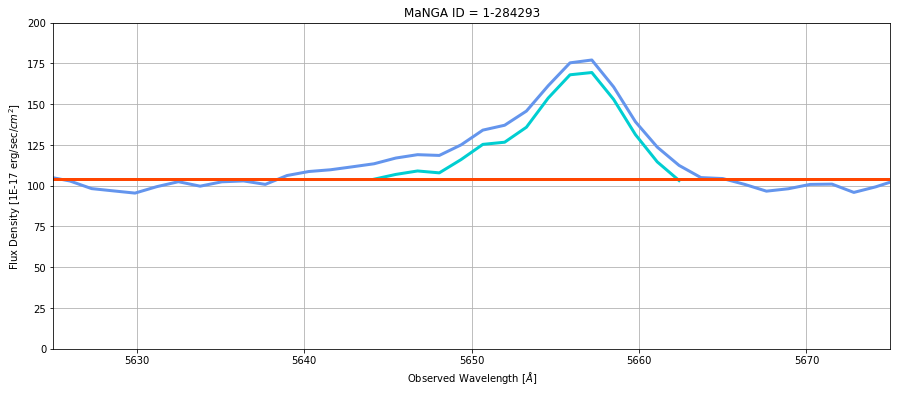

In [109]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0, height)
# plt.ylim(100,125)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [115]:
line1 = 5661
line2 = 5663
height1 = 102
height2 = 115

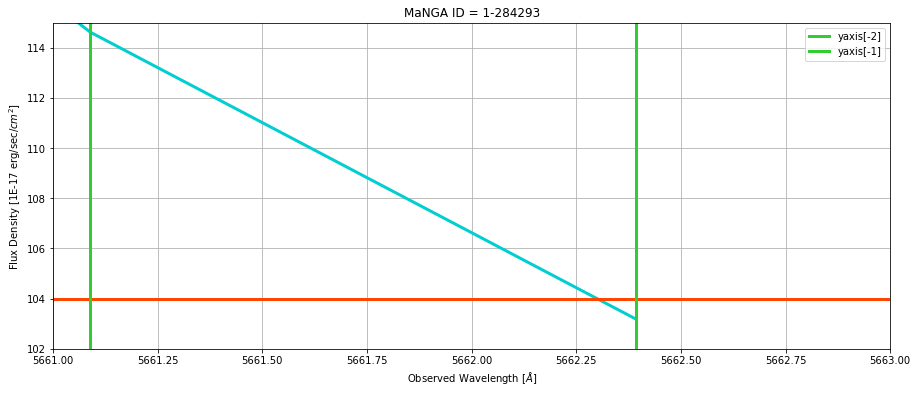

In [116]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [117]:
index2 = np.where(yaxis_lower == yaxis_lower[-2])[0][0]
print(index2)
sumresult[index2]

13


114.61653211712837

In [118]:
# Get x and y of the both coordinates that define the line above 
x = [wave[yaxis_lower[-2]], wave[yaxis_lower[-1]]]
y = [sumresult[index2], sumresult[index2 + 1]]
print(x)
print(y)
print(sumresult[index2])

[5661.089226332155, 5662.3928903825345]
[114.61653211712837, 103.18236035853624]
114.61653211712837


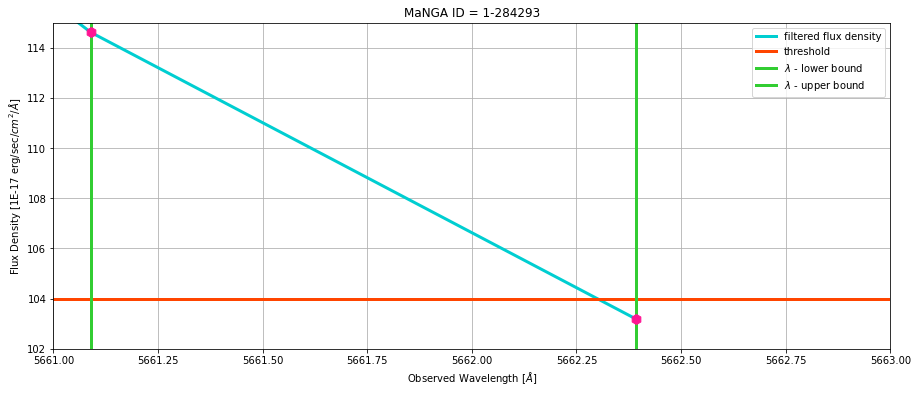

In [119]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
# plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')

plt.plot(x[0], y[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x[1], y[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [120]:
# Get the gradient of the line above 
m = (y[1] - y[0])/(x[1] - x[0])
m

-8.770796245598822

In [121]:
# Get the y intercept of the line above 
c = y[0] - m*x[0]
c

49766.87666443113

In [122]:
# Define the function y = mx + c 
def func(y, m, c):
    print(y, m, c)
    x = (y - c)/m
    return x

In [123]:
xval = func(sumresult[index], m, c)
xval

103.99424232915044 -8.770796245598822 49766.87666443113


5662.3003238757

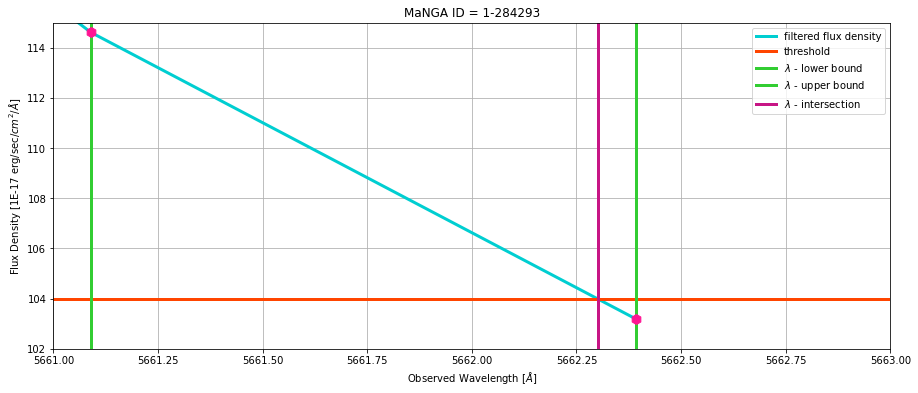

In [124]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')
plt.axvline(xval, color = 'mediumvioletred', linewidth = 3, label = r'$\lambda$ - intersection')
plt.plot(x[0], y[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x[1], y[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [125]:
xcoord = []
ycoord = []

for i in range(yaxis_lower[0], yaxis_lower[-1]):
    xcoord.append(wave[i])
    
xcoord.append(xval)
ycoord = sumresult[:-1]
ycoord.append(sumresult[index])
len(xcoord), len(sumresult), len(ycoord)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(15, 15, 15)

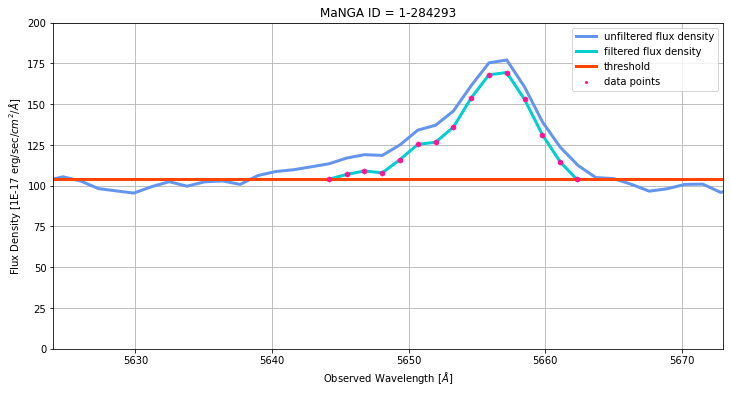

In [126]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start-1, end-2)
# plt.xlim(5500, 5700)
plt.ylim(0,height)
# plt.ylim(0,700)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3, label = 'unfiltered flux density')
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3
        , label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

for i in range(len(xcoord)):
    plt.plot(xcoord[i], ycoord[i], color = 'deeppink', marker = 'h', ms = 5)

plt.scatter(0,0, color = 'deeppink', marker = 'h', s = 5, label = 'data points')
plt.legend()
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [127]:
dlmd = []
for i in range(len(xcoord)-1):
    dlmd.append(xcoord[i+1] - xcoord[i])

In [128]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area = ycoord[0] * dlmd[0] + ycoord[-1] * dlmd[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord)-1):
#     print(i)
    area += ycoord[i] * (dlmd[i-1] + dlmd[i])

finalarea = (1/2) * area
finalarea

2361.62671811341

In [129]:
subtract = ycoord[0] * (xcoord[-1] - xcoord[0])
subtract

1885.56558604911

In [130]:
fluxarea = finalarea - subtract
fluxarea

476.06113206429995

In [131]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

nsa_z

0.12908

In [132]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

## Upper Bound -- Higher MBH

In [133]:
start_upper = 5625
end_upper = 5680

In [134]:
# select peak region
# index = 0
yaxis = np.where(np.logical_and(wave > start_upper, wave < end_upper))[0]
# print(yaxis)
    
# yaxis = yaxis[9:32]
yaxis_upper = yaxis[6:33]
print(yaxis_upper)
print(len(yaxis_upper))

# for i in yaxis:
#     print(wave[i])

[1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932
 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945]
27


In [135]:
flux_compare_upper = [] 
ivar_compare_upper = []

for i in yaxis_upper:
    flux_compare_upper.append(flux[:,:,i].flatten())
    ivar_compare_upper.append(ivar[:,:,i].flatten())

flux_compare_upper = np.array(flux_compare_upper)
ivar_compare_upper = np.array(ivar_compare_upper)

len(flux_compare_upper[0]), len(ivar_compare_upper)

(2916, 27)

In [136]:
result_upper = []
sumresult_upper = []

for i in range(len(yaxis_upper)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare_upper[i][j]) if ivar_compare_upper[i][j] != 0 else 0
        
        if flux_compare_upper[i][j] < (3 * sigma):
            result_upper.append(0)
        else:
            result_upper.append(flux_compare_upper[i][j])
    sumresult_upper.append(np.sum(result_upper))
    result_upper = []

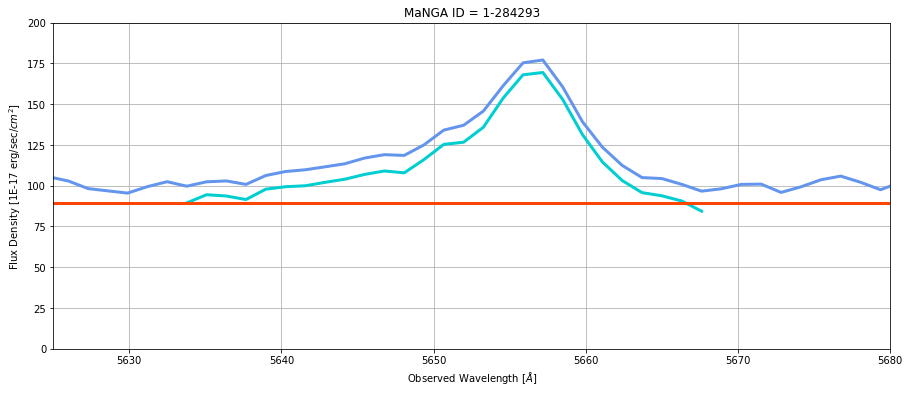

In [137]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start_upper, end_upper)
# plt.xlim(5590, 5595)
plt.ylim(0, height)
# plt.ylim(75, 90)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [138]:
line1_upper = 5666
line2_upper = 5668
height1_upper = 80
height2_upper = 95

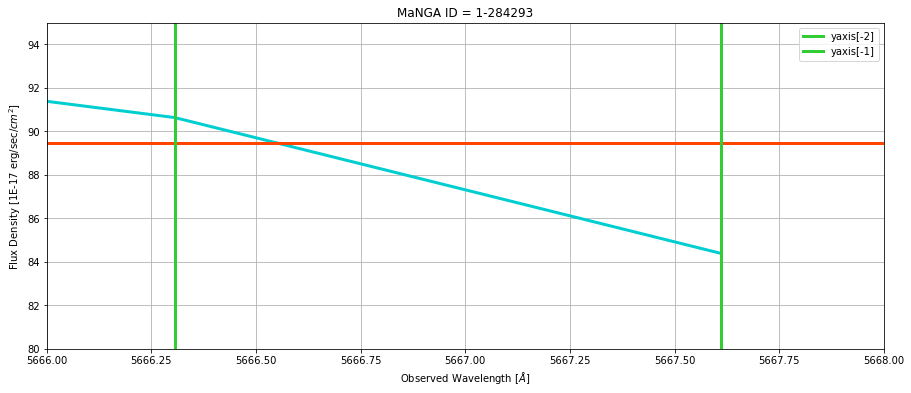

In [139]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis_upper[-2]], color = 'limegreen', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis_upper[-1]], color = 'limegreen', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [140]:
index2_upper = np.where(yaxis_upper == yaxis_upper[-2])[0][0]
print(index2_upper)
sumresult_upper[index2_upper]

25


90.63432281091809

In [141]:
# Get x and y of the both coordinates that define the line above 
x_upper = [wave[yaxis_upper[-2]], wave[yaxis_upper[-1]]]
y_upper = [sumresult_upper[index2_upper], sumresult_upper[index2_upper + 1]]
print(x_upper)
print(y_upper)
print(sumresult_upper[index2_upper])

[5666.305684096034, 5667.6105494184985]
[90.63432281091809, 84.3902331981808]
90.63432281091809


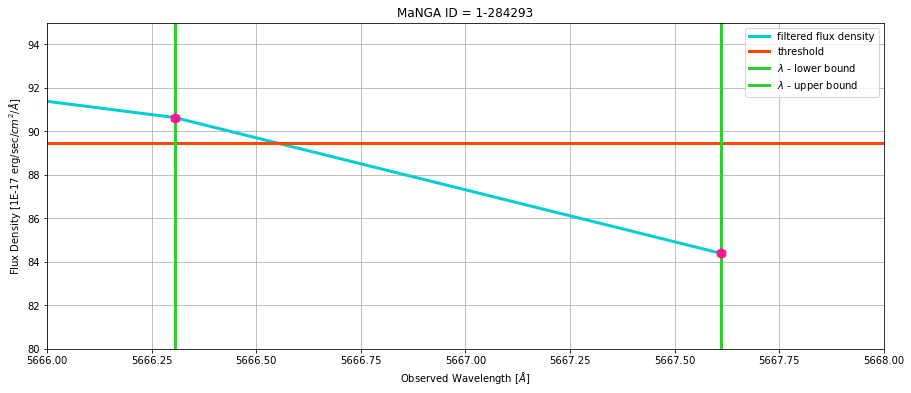

In [142]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
# plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_upper[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_upper[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')

plt.plot(x_upper[0], y_upper[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x_upper[1], y_upper[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [143]:
# Get the gradient of the line above 
m_upper = (y_upper[1] - y_upper[0])/(x_upper[1] - x_upper[0])
m_upper

-4.785236840339823

In [144]:
# Get the y intercept of the line above 
c_upper = y_upper[0] - m_upper*x_upper[0]
c_upper

27205.249030974202

In [145]:
xval_upper = func(sumresult_upper[index], m_upper, c_upper)
xval_upper

89.4607404768467 -4.785236840339823 27205.249030974202


5666.550934722749

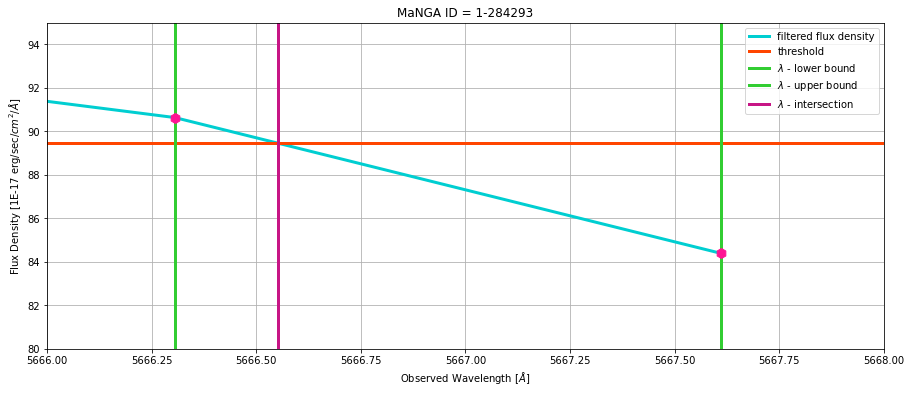

In [146]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_upper[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_upper[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')
plt.axvline(xval_upper, color = 'mediumvioletred', linewidth = 3, label = r'$\lambda$ - intersection')
plt.plot(x_upper[0], y_upper[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x_upper[1], y_upper[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [147]:
xcoord_upper = []
ycoord_upper = []

for i in range(yaxis_upper[0], yaxis_upper[-1]):
    xcoord_upper.append(wave[i])
    
xcoord_upper.append(xval_upper)
ycoord_upper = sumresult_upper[:-1]
ycoord_upper.append(sumresult_upper[index])
len(xcoord_upper), len(sumresult_upper), len(ycoord_upper)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(27, 27, 27)

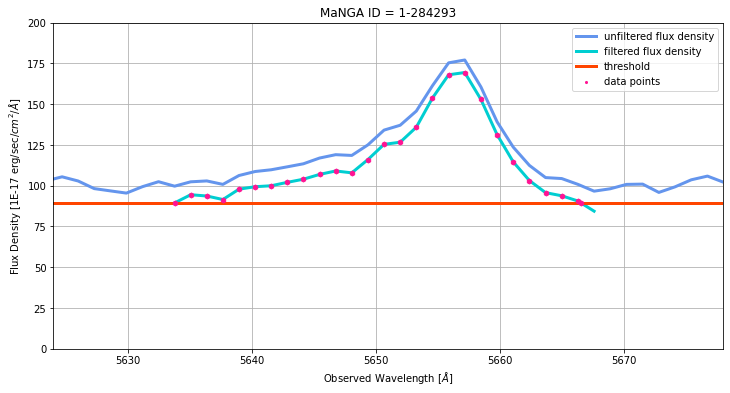

In [148]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start_upper-1, end_upper-2)
# plt.xlim(5500, 5700)
plt.ylim(0,height)
# plt.ylim(0,700)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3, label = 'unfiltered flux density')
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3
        , label = 'filtered flux density')
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered', label = 'threshold')

for i in range(len(xcoord_upper)):
    plt.plot(xcoord_upper[i], ycoord_upper[i], color = 'deeppink', marker = 'h', ms = 5)

plt.scatter(0,0, color = 'deeppink', marker = 'h', s = 5, label = 'data points')
plt.legend()
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [149]:
dlmd_upper = []
for i in range(len(xcoord_upper)-1):
    dlmd_upper.append(xcoord_upper[i+1] - xcoord_upper[i])

In [150]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area_upper = ycoord_upper[0] * dlmd_upper[0] + ycoord_upper[-1] * dlmd_upper[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord_upper)-1):
#     print(i)
    area_upper += ycoord_upper[i] * (dlmd_upper[i-1] + dlmd_upper[i])

finalarea_upper = (1/2) * area_upper
finalarea_upper

3774.2259160812755

In [151]:
subtract_upper = ycoord_upper[0] * (xcoord_upper[-1] - xcoord_upper[0])
subtract_upper

2931.5771340491474

In [152]:
fluxarea_upper = finalarea_upper - subtract_upper
fluxarea_upper

842.6487820321281

In [153]:
luminosity_distance = Mpc_to_cm(605.6)
luminosity_upper = luminosity_calc(luminosity_distance, fluxarea_upper)
print(luminosity_distance, 'cm', '/', luminosity_upper, ('erg/s (?)'))

1.868687808e+27 cm / 3.697685460585818e+41 erg/s (?)


In [154]:
print('UPPER BOUND')
print('flux', fluxarea_upper)
print('M_BH / M_sol =',BH_calc(luminosity_upper))
print('log(luminosity) =',np.log10(luminosity_upper))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_upper)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_upper / sol_luminosity))

UPPER BOUND
flux 842.6487820321281
M_BH / M_sol = 9379870.021652697
log(luminosity) = 41.56792996562744
log(M_BH / M_sol) = 6.9721968203332105
log(luminosity / sol_lum) = 7.9829206857249835


In [155]:
luminosity_distance = Mpc_to_cm(605.6)
luminosity = luminosity_calc(luminosity_distance, fluxarea)
print(luminosity_distance, 'cm', '/', luminosity, ('erg/s (?)'))

1.868687808e+27 cm / 2.08903681334351e+41 erg/s (?)


In [156]:
print('LOWER BOUND')
print('flux', fluxarea)
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

LOWER BOUND
flux 476.06113206429995
M_BH / M_sol = 5299232.178743858
log(luminosity) = 41.31994609325512
log(M_BH / M_sol) = 6.724212947960884
log(luminosity / sol_lum) = 7.734936813352657


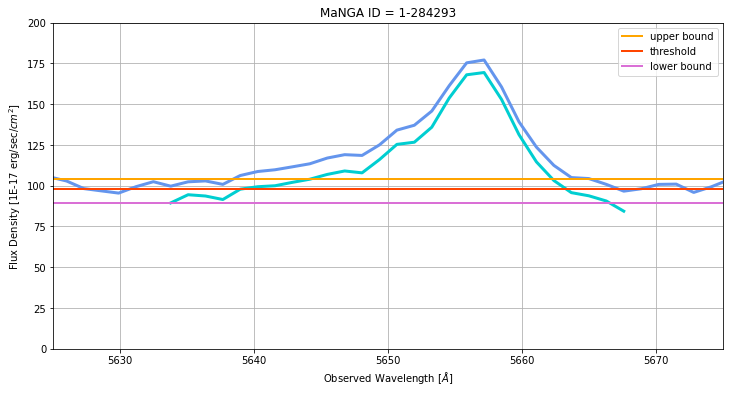

In [157]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start, end)
# plt.xlim(5500,5700)
plt.ylim(0, height)
# plt.ylim(200,300)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 2, color = 'orange', label = 'upper bound')

plt.axhline(97.88267247751355, linewidth = 2, color = 'orangered', label = 'threshold')
# plt.axhline(106.03559160605073, linewidth = 2, color = 'orangered', label = 'threshold')

plt.axhline(sumresult_upper[index], linewidth = 2, color = 'orchid', label = 'lower bound')


plt.legend()

# plt.savefig('Images/ub_th_lb.png', bbox_inches = 'tight')